# **1. Perkenalan Dataset**

Dataset yang digunakan dalam proyek ini adalah **Telco Customer Churn**. Dataset ini berisi informasi tentang pelanggan perusahaan telekomunikasi dan apakah mereka berhenti berlangganan (churn) atau tidak.

**Ketentuan Dataset:**
* **Sumber:** Kaggle (Telco Customer Churn) / UCI ML Repository.
* **Target:** Kolom `Churn` (Classification).
* **Fitur:** Demografi pelanggan, layanan yang digunakan, dan informasi tagihan.

Tujuan eksperimen ini adalah membersihkan data agar siap digunakan untuk melatih model Machine Learning.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# **2. Import Library**

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import os

# Konfigurasi visualisasi
sns.set(style="whitegrid")
print("Library berhasil diimport!")

Library berhasil diimport!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
try:
    df = pd.read_csv('../data_raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print("Dataset berhasil dimuat!")
except FileNotFoundError:
    print("File tidak ditemukan. Pastikan file 'WA_Fn-UseC_-Telco-Customer-Churn.csv' ada di folder '../data_raw/'")

df.head()

Dataset berhasil dimuat!


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

C:\Users\hp\AppData\Local\Temp\ipykernel_19124\4150399704.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='viridis')


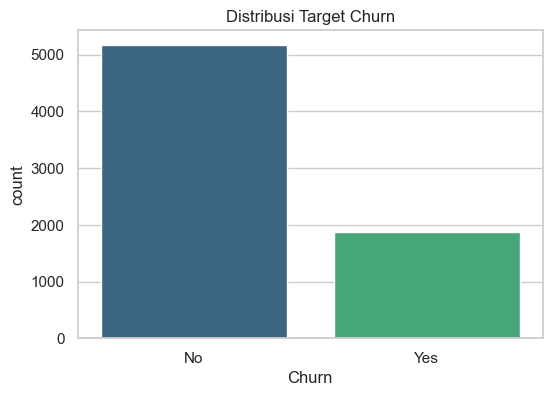

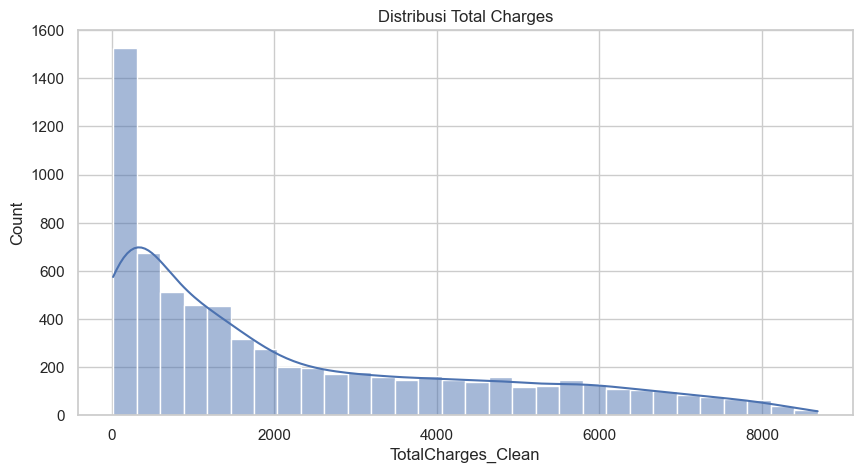


Jumlah Missing Values:
customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
TotalCharges_Clean    11
dtype: int64


In [3]:
print("Info Dataset:")
df.info()

print("\nStatistik Deskriptif:")
print(df.describe(include='all'))

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='viridis')
plt.title('Distribusi Target Churn')
plt.show()

df['TotalCharges_Clean'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

plt.figure(figsize=(10, 5))
sns.histplot(df['TotalCharges_Clean'].dropna(), kde=True, bins=30)
plt.title('Distribusi Total Charges')
plt.show()

print("\nJumlah Missing Values:")
print(df.isnull().sum())

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [5]:
print("1. Cleaning Data...")
# TotalCharges masih object karena ada spasi kosong " ", ubah ke numeric, error jadi NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Hapus baris yang NaN 
df = df.dropna()

# Menghapus Data Duplikat & Kolom Tidak Perlu
if 'customerID' in df.columns:
    df = df.drop(['customerID'], axis=1)

# Hapus kolom bantuan EDA tadi jika ada
if 'TotalCharges_Clean' in df.columns:
    df = df.drop(['TotalCharges_Clean'], axis=1)

# Encoding Data Kategorikal
print("2. Encoding Data...")
le = LabelEncoder()
# Encode Target
df['Churn'] = le.fit_transform(df['Churn'])

# Encode Fitur Kategorikal (One-Hot Encoding)
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Normalisasi/Standarisasi Fitur
print("3. Scaling Data...")
scaler = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Simpan Data Bersih
output_filename = "data_clean.csv"
df.to_csv(output_filename, index=False)

print(f"\nPreprocessing Selesai! Data bersih disimpan sebagai '{output_filename}'")
print(f"Dimensi data akhir: {df.shape}")
df.head()

1. Cleaning Data...
2. Encoding Data...
3. Scaling Data...

Preprocessing Selesai! Data bersih disimpan sebagai 'data_clean.csv'
Dimensi data akhir: (7032, 31)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.280248,-1.161694,-0.994194,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,0.064303,-0.260878,-0.173740,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,-1.239504,-0.363923,-0.959649,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,0.512486,-0.747850,-0.195248,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,-1.239504,0.196178,-0.940457,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
